<a href="https://colab.research.google.com/github/anishantony8/AWS/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#ND6YN7O40DGP0YYS
!pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='ND6YN7O40DGP0YYS', output_format='pandas')
day = ts.get_intraday('AAPL', interval='30min')
df = day[0]
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-06-15 19:30:00,185.670,185.76,185.670,185.7300,16442.0
2023-06-15 19:00:00,185.660,185.70,185.650,185.6600,4156.0
2023-06-15 18:30:00,185.690,185.71,185.540,185.6400,6909.0
2023-06-15 18:00:00,185.810,185.81,185.530,185.6900,17491.0
2023-06-15 17:30:00,185.653,185.85,185.653,185.8000,22132.0
...,...,...,...,...,...
2023-06-13 04:00:00,182.760,182.87,182.010,182.5200,61520.0
2023-06-12 19:30:00,183.880,183.99,181.500,182.5099,358974.0
2023-06-12 19:00:00,184.290,184.35,183.790,183.7900,83106.0


In [6]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

class Script_Data:
  def fetch_intraday_data(self,stock):
    self.stock = stock

    return self.stock

  def convert_intraday_data(self):
        try:
            ts = TimeSeries(key='ND6YN7O40DGP0YYS', output_format='pandas')
            day = ts.get_intraday(self.stock, interval='30min')
            df = day[0]
            old = df.columns
            new = []
            for i in df.columns:
                new.append(i.split('.')[1].strip())
            col = {k: v for k, v in zip(old, new)}
            df.rename(columns=col, inplace=True)

            df['volume'] = df['volume'].astype(int)
            return self.df
        except ValueError:
            print('Please enter the correct values')

In [7]:
class Stock:
    def __getitem__(self, index):
        return Script_Data().fetch_intraday_data(index).convert_intraday_data()

In [8]:
a = Stock()

In [20]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

class Script_Data:
    def __init__(self):
      self.items = ['AAPL','GOOGL']
      self.stock = None


    def fetch_intraday_data(self, stock):
        self.stock = stock
        return self

    def convert_intraday_data(self):
        try:
            ts = TimeSeries(key='ND6YN7O40DGP0YYS', output_format='pandas')
            day = ts.get_intraday(self.stock, interval='60min')
            df = day[0]
            old = df.columns
            new = []
            for i in df.columns:
                new.append(i.split('.')[1].strip())
            col = {k: v for k, v in zip(old, new)}
            df.rename(columns=col, inplace=True)
            df = df.reset_index()
            df['date'] = pd.to_datetime(df['date'])
            df = df.rename(columns={'date': 'timestamp'})
            df['volume'] = df['volume'].astype(int)
            self.data = df
            return self.data
        except ValueError:
            print('Please enter the correct values')
    def __contains__(self, item):
      return item in self.items

class Stocks:
    def __getitem__(self, index):
        return Script_Data().fetch_intraday_data(index).convert_intraday_data()
a = Stocks()
df = a['GOOGL']
df

,timestamp,open,high,low,close,volume
0,2023-06-15 19:00:00,124.7800,124.9000,124.78,124.85,4340
1,2023-06-15 18:00:00,124.8600,124.9490,124.67,124.80,9110
2,2023-06-15 17:00:00,124.9292,124.9699,124.79,124.94,7365
3,2023-06-15 16:00:00,125.0900,125.0900,124.77,124.90,1787361
4,2023-06-15 15:00:00,125.1600,125.4600,124.87,125.11,5862624
...,...,...,...,...,...,...
95,2023-06-08 04:00:00,122.1500,122.7900,122.08,122.75,20113
96,2023-06-07 19:00:00,122.4900,122.5000,122.34,122.48,15515
97,2023-06-07 18:00:00,122.5500,122.5800,122.38,122.42,12926
98,2023-06-07 17:00:00,122.3000,122.5892,122.30,122.52,919795


In [10]:
class Sets:
    def __init__(self):
        self.data = {}

    def __setitem__(self, index, value):
        self.data[index] = value
s = Sets()
s['GOOGL'] = Script_Data().fetch_intraday_data('GOOGL').convert_intraday_data()
print(s.data['GOOGL'])

             timestamp      open      high     low   close   volume
0  2023-06-15 19:00:00  124.7800  124.9000  124.78  124.85     4340
1  2023-06-15 18:00:00  124.8600  124.9490  124.67  124.80     9110
2  2023-06-15 17:00:00  124.9292  124.9699  124.79  124.94     7365
3  2023-06-15 16:00:00  125.0900  125.0900  124.77  124.90  1787361
4  2023-06-15 15:00:00  125.1600  125.4600  124.87  125.11  5862624
..                 ...       ...       ...     ...     ...      ...
95 2023-06-08 04:00:00  122.1500  122.7900  122.08  122.75    20113
96 2023-06-07 19:00:00  122.4900  122.5000  122.34  122.48    15515
97 2023-06-07 18:00:00  122.5500  122.5800  122.38  122.42    12926
98 2023-06-07 17:00:00  122.3000  122.5892  122.30  122.52   919795
99 2023-06-07 16:00:00  122.5000  122.7100  122.26  122.26  2378296

[100 rows x 6 columns]


In [153]:
import pandas as pd

def indicator1(df, timeperiod):
    df['indicator'] = df['close'].rolling(timeperiod).mean()
    result_df = df[['timestamp', 'indicator']]
    return result_df
timeperiod = 5
a= Stocks()
result = indicator1(a['GOOGL'], timeperiod=5)
result


,timestamp,indicator
0,2023-06-15 19:00:00,NaN
1,2023-06-15 18:00:00,NaN
2,2023-06-15 17:00:00,NaN
3,2023-06-15 16:00:00,NaN
4,2023-06-15 15:00:00,124.920
...,...,...
95,2023-06-08 04:00:00,122.686
96,2023-06-07 19:00:00,122.602
97,2023-06-07 18:00:00,122.610
98,2023-06-07 17:00:00,122.594


In [79]:
a('GOOGL')

,timestamp,open,high,low,close,volume
0,2023-06-15 19:00:00,124.7800,124.9000,124.78,124.85,4340
1,2023-06-15 18:00:00,124.8600,124.9490,124.67,124.80,9110
2,2023-06-15 17:00:00,124.9292,124.9699,124.79,124.94,7365
3,2023-06-15 16:00:00,125.0900,125.0900,124.77,124.90,1787361
4,2023-06-15 15:00:00,125.1600,125.4600,124.87,125.11,5862624
...,...,...,...,...,...,...
95,2023-06-08 04:00:00,122.1500,122.7900,122.08,122.75,20113
96,2023-06-07 19:00:00,122.4900,122.5000,122.34,122.48,15515
97,2023-06-07 18:00:00,122.5500,122.5800,122.38,122.42,12926
98,2023-06-07 17:00:00,122.3000,122.5892,122.30,122.52,919795


In [95]:
class Strategy(Script_Data):
  def __init__(self,stock):
    super().__init__()
    self.stock = stock
    self.df = self.fetch_intraday_data(self.stock).convert_intraday_data()
    return self.df


In [124]:
class Strategy(Script_Data):
    def __init__(self, stock):
        super().__init__()
        self.stock = stock
        return self.fetch_intraday_data(self.stock).convert_intraday_data()



In [235]:
class Strategy:
    def __init__(self, stock):
        self.script_data = Script_Data()
        self.stock = stock

    def get_script_data(self):
        return self.script_data.fetch_intraday_data(self.stock).convert_intraday_data()

    def indicator1(self):
      df = self.get_script_data()
      df['indicator'] = df['close'].rolling(window=5).mean()
      return df[['timestamp','indicator','close']]
    def get_signals(self):
      df = self.indicator1()
      signals_df = df.copy()
      signals_df['signal'] = 'NO_SIGNAL'
      signals_df.loc[signals_df['indicator'] > signals_df['close'], 'signal'] = 'SELL'
      signals_df.loc[signals_df['indicator'] < signals_df['close'], 'signal'] = 'BUY'
      return signals_df[['timestamp','signal']]
    def print_signals(self):
      df = self.get_signals()
      df = df.loc[df['signal']!='NO_SIGNAL']
      return df

data = Strategy('GOOGL')
signals_df = data.print_signals()
signals_df

,timestamp,signal
4,2023-06-15 15:00:00,BUY
5,2023-06-15 14:00:00,BUY
6,2023-06-15 13:00:00,SELL
7,2023-06-15 12:00:00,SELL
8,2023-06-15 11:00:00,SELL
...,...,...
95,2023-06-08 04:00:00,BUY
96,2023-06-07 19:00:00,SELL
97,2023-06-07 18:00:00,SELL
98,2023-06-07 17:00:00,SELL


In [240]:
!pip install pyalgotrading
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.8 MB/s eta 0:00:00


In [241]:
from pyalgotrading.visual import TradingVisuals
data = Strategy('GOOGL')
candlestick_data =  data.indicator1()
candlestick_data

ModuleNotFoundError: ignored

In [242]:
!pip install pyalgotrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [244]:
import mplfinance as mpf

In [258]:
data = Strategy('GOOGL')
df =  data.get_script_data()
indicator  = data.indicator1()


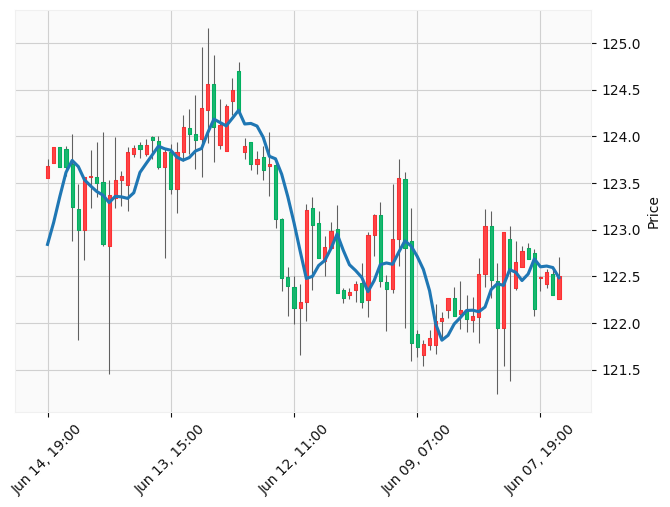

In [266]:
import mplfinance as mpf
df = df[4:]
# Assuming you have a DataFrame called 'df' with OHLC (Open, High, Low, Close) data
ohlc_data = df[['timestamp', 'open', 'high', 'low', 'close']]
ohlc_data.set_index('timestamp', inplace=True)
indicator = indicator[4:]
# Assuming you have a DataFrame called 'indicator' with the indicator data
indicator_data = indicator[['timestamp', 'indicator']]
indicator_data.set_index('timestamp', inplace=True)

# Plot the candlestick chart with the indicator data
add_plot = mpf.make_addplot(indicator_data['indicator'])
mpf.plot(ohlc_data, type='candle', style='yahoo', addplot=add_plot)



In [261]:
df

,timestamp,open,high,low,close,volume
4,2023-06-15 15:00:00,125.16,125.4600,124.87,125.1100,5862624
5,2023-06-15 14:00:00,124.35,125.3000,124.12,125.1600,3570063
6,2023-06-15 13:00:00,123.60,124.3800,123.24,124.3288,2302384
7,2023-06-15 12:00:00,124.10,124.2600,123.37,123.6000,2543578
8,2023-06-15 11:00:00,123.67,124.4900,123.59,124.1050,4910676
...,...,...,...,...,...,...
95,2023-06-08 04:00:00,122.15,122.7900,122.08,122.7500,20113
96,2023-06-07 19:00:00,122.49,122.5000,122.34,122.4800,15515
97,2023-06-07 18:00:00,122.55,122.5800,122.38,122.4200,12926
98,2023-06-07 17:00:00,122.30,122.5892,122.30,122.5200,919795


In [262]:
indicator

,timestamp,indicator,close
4,2023-06-15 15:00:00,124.92000,125.1100
5,2023-06-15 14:00:00,124.98200,125.1600
6,2023-06-15 13:00:00,124.88776,124.3288
7,2023-06-15 12:00:00,124.61976,123.6000
8,2023-06-15 11:00:00,124.46076,124.1050
...,...,...,...
95,2023-06-08 04:00:00,122.68600,122.7500
96,2023-06-07 19:00:00,122.60200,122.4800
97,2023-06-07 18:00:00,122.61000,122.4200
98,2023-06-07 17:00:00,122.59400,122.5200


In [157]:
joined_df = result.merge(another, how='inner', on='timestamp')

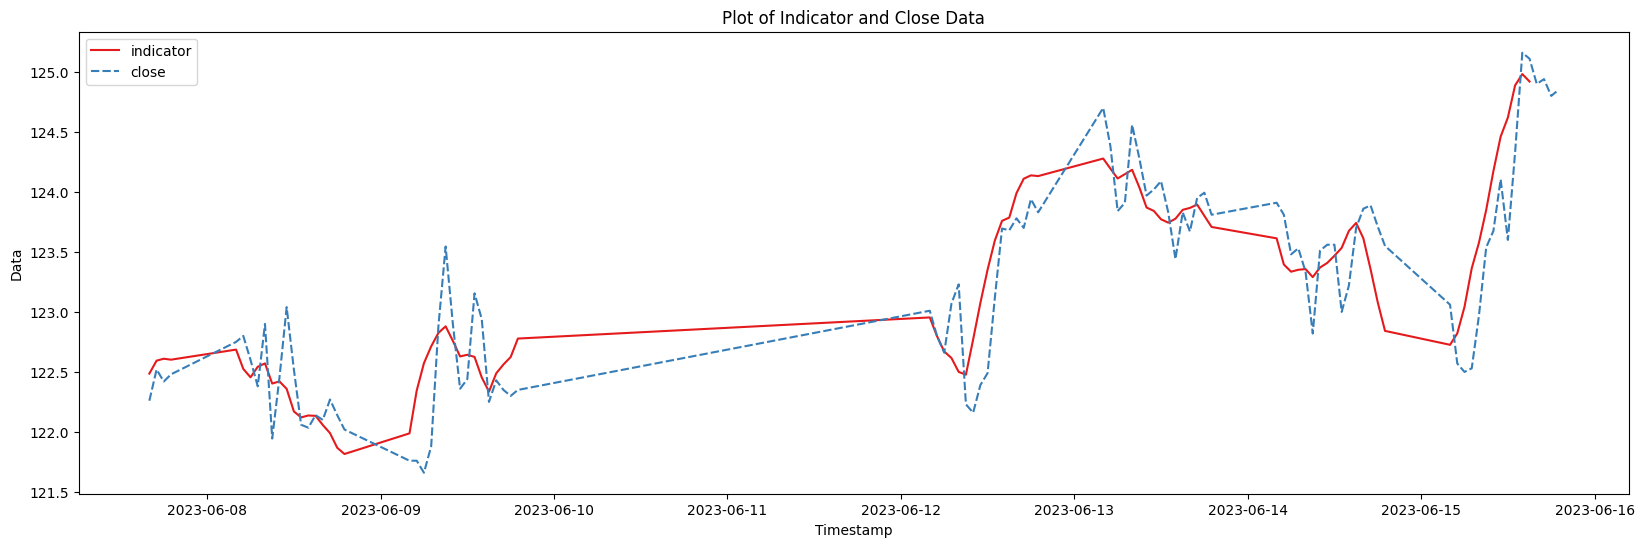

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.lineplot(data=joined_df[['indicator', 'close']], palette='Set1')
plt.xlabel('Timestamp')
plt.ylabel('Data')
plt.title('Plot of Indicator and Close Data')
plt.show()

In [173]:
joined_df.reset_index(inplace=True)

In [229]:
df = joined_df.copy()
df['signal'] = 'NO_SIGNAL'
df.loc[df['indicator'] > df['close'], 'signal'] = 'SELL'
df.loc[df['indicator'] < df['close'], 'signal'] = 'BUY'
df[['timestamp','signal']]


,timestamp,signal
0,2023-06-15 19:00:00,NO_SIGNAL
1,2023-06-15 18:00:00,NO_SIGNAL
2,2023-06-15 17:00:00,NO_SIGNAL
3,2023-06-15 16:00:00,NO_SIGNAL
4,2023-06-15 15:00:00,BUY
...,...,...
95,2023-06-08 04:00:00,BUY
96,2023-06-07 19:00:00,SELL
97,2023-06-07 18:00:00,SELL
98,2023-06-07 17:00:00,SELL
